<a href="https://colab.research.google.com/github/rohithrtvarma/Deep-Learning-/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
tf.__version__

'2.2.0'

In [4]:
import keras

Using TensorFlow backend.


In [5]:
keras.__version__

'2.3.1'

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
import matplotlib.pyplot as plt

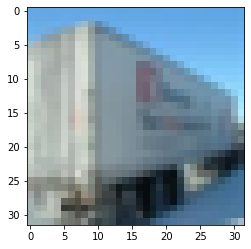

In [9]:
plt.imshow(x_train[15])

In [10]:
x_train=x_train.astype('float32')

In [11]:
x_test=x_test.astype('float32')

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
from keras.utils import to_categorical
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [14]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
# show preferred channel order
from keras import backend
print(backend.image_data_format())

channels_last


Building the model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [18]:
model=keras.Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               460928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 462,666
Trainable params: 462,666
Non-trainable params: 0
_________________________________________________________________


In [20]:

model.fit(x_train,y_cat_train,epochs=100)

Epoch 1/100
50000/50000 [==============================] - 17s 340us/step - loss: 1.5005 - accuracy: 0.4668
Epoch 2/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.2000 - accuracy: 0.5789
Epoch 3/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.0801 - accuracy: 0.6250
Epoch 4/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.9930 - accuracy: 0.6546
Epoch 5/100
50000/50000 [==============================] - 11s 226us/step - loss: 0.9192 - accuracy: 0.6817
Epoch 6/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.8491 - accuracy: 0.7054
Epoch 7/100
50000/50000 [==============================] - 12s 235us/step - loss: 0.7922 - accuracy: 0.7264
Epoch 8/100
50000/50000 [==============================] - 10s 192us/step - loss: 0.7359 - accuracy: 0.7429
Epoch 9/100
50000/50000 [==============================] - 9s 187us/step - loss: 0.6834 - accuracy: 0.7665
Epoch 10/100
50000/50000 [===

In [21]:

model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 118us/step


[8.075426029586792, 0.6061000227928162]

In [22]:
from sklearn.metrics import classification_report

In [23]:

predictions = model.predict_classes(x_test)

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1000
           1       0.72      0.76      0.74      1000
           2       0.53      0.50      0.51      1000
           3       0.39      0.44      0.42      1000
           4       0.60      0.45      0.51      1000
           5       0.47      0.52      0.49      1000
           6       0.68      0.64      0.66      1000
           7       0.63      0.69      0.66      1000
           8       0.80      0.67      0.73      1000
           9       0.66      0.70      0.68      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.61     10000
weighted avg       0.61      0.61      0.61     10000



In [25]:
#Method2

In [26]:
#from tensorflow.keras import layers
!pip install -U keras-tuner



     |████████████████████████████████| 61kB 2.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=76cc4a8c9cf5b9263d51c9e7870f288981b7ed5b60b136a37a4a3bfdd3de4dec
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=50dcd2d85d488cb58c3929aa36eeda18f9171184d3d1e40960b4ab359d9b8290
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
from kerastuner.tuners import RandomSearch

In [29]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [30]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [31]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='op',project_name="cifar10")

In [32]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4507 - accuracy: 0.4762 - val_loss: 1.1731 - val_accuracy: 0.5926
Epoch 2/3
1407/1407 [==============================] - 15s 11ms/step - loss: 1.0605 - accuracy: 0.6243 - val_loss: 1.0627 - val_accuracy: 0.6290
Epoch 3/3
1407/1407 [==============================] - 16s 11ms/step - loss: 0.8742 - accuracy: 0.6932 - val_loss: 1.0555 - val_accuracy: 0.6402


Epoch 1/3
1407/1407 [==============================] - 18s 12ms/step - loss: 2.4592 - accuracy: 0.0982 - val_loss: 2.3054 - val_accuracy: 0.0958
Epoch 2/3
1407/1407 [==============================] - 16s 12ms/step - loss: 2.3037 - accuracy: 0.1006 - val_loss: 2.3044 - val_accuracy: 0.0976
Epoch 3/3
1407/1407 [==============================] - 17s 12ms/step - loss: 2.3042 - accuracy: 0.0973 - val_loss: 2.3037 - val_accuracy: 0.0958


Epoch 1/3
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5644 - accuracy: 0.4364 - val_loss: 1.3221 - val_accuracy: 0.5298
Epoch 2/3
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2615 - accuracy: 0.5528 - val_loss: 1.3588 - val_accuracy: 0.5162
Epoch 3/3
1407/1407 [==============================] - 16s 11ms/step - loss: 1.1101 - accuracy: 0.6064 - val_loss: 1.1512 - val_accuracy: 0.5932


Epoch 1/3
1407/1407 [==============================] - 15s 10ms/step - loss: 2.3773 - accuracy: 0.0986 - val_loss: 2.3035 - val_accuracy: 0.0976
Epoch 2/3
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3043 - accuracy: 0.0968 - val_loss: 2.3046 - val_accuracy: 0.0970
Epoch 3/3
1407/1407 [==============================] - 15s 10ms/step - loss: 2.3039 - accuracy: 0.0997 - val_loss: 2.3040 - val_accuracy: 0.0950


Epoch 1/3
1407/1407 [==============================] - 17s 12ms/step - loss: 2.4297 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 2/3
1407/1407 [==============================] - 18s 13ms/step - loss: 2.3039 - accuracy: 0.1001 - val_loss: 2.3054 - val_accuracy: 0.0970
Epoch 3/3
1407/1407 [==============================] - 20s 14ms/step - loss: 2.3039 - accuracy: 0.0993 - val_loss: 2.3034 - val_accuracy: 0.1024


INFO:tensorflow:Oracle triggered exit


In [33]:

model=tuner_search.get_best_models(num_models=1)[0]

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 48)        27696     
_________________________________________________________________
flatten (Flatten)            (None, 37632)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1204256   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 1,234,074
Trainable params: 1,234,074
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.7107 - accuracy: 0.7498 - val_loss: 1.0847 - val_accuracy: 0.6338
Epoch 2/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.5528 - accuracy: 0.8067 - val_loss: 1.1631 - val_accuracy: 0.6350
Epoch 3/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4117 - accuracy: 0.8570 - val_loss: 1.3449 - val_accuracy: 0.6232
Epoch 4/100
1407/1407 [==============================] - 16s 12ms/step - loss: 0.3004 - accuracy: 0.8952 - val_loss: 1.5324 - val_accuracy: 0.6192
Epoch 5/100
1407/1407 [==============================] - 16s 12ms/step - loss: 0.2145 - accuracy: 0.9252 - val_loss: 1.8327 - val_accuracy: 0.6120
Epoch 6/100
1407/1407 [==============================] - 16s 12ms/step - loss: 0.1570 - accuracy: 0.9450 - val_loss: 2.2230 - val_accuracy: 0.5972
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 0.1363 - accuracy: 0.9532 - val_loss: 2

In [37]:
from sklearn.metrics import classification_report

In [38]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      1000
           1       0.69      0.71      0.70      1000
           2       0.42      0.34      0.38      1000
           3       0.35      0.41      0.38      1000
           4       0.51      0.54      0.52      1000
           5       0.45      0.52      0.48      1000
           6       0.66      0.61      0.63      1000
           7       0.63      0.62      0.62      1000
           8       0.73      0.67      0.70      1000
           9       0.65      0.70      0.67      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000

